In [1]:
import sqlite3
import requests
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db


In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [3]:
conn = sqlite3.connect('data\movies.db')

In [4]:
movie_title = pd.read_sql ('''SELECT original_title, release_date, genres , worldwide_gross, production_budget, runtime_minutes
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              
                              
                              ''',conn)

movie_title

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy","$73,706","$45,000,000",91.0
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy","$122,133,227","$20,000,000",NaN
2,The Overnight,"Jun 19, 2015",None,"$1,165,996","$200,000",88.0
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance","$9,313,302","$25,000,000",124.0
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama","$187,861,183","$91,000,000",114.0
...,...,...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,"$6,916,869","$30,000,000",NaN
3811,The Promise,"Apr 21, 2017",Drama,"$10,551,417","$90,000,000",NaN
3812,Sublime,"Mar 13, 2007",Documentary,$0,"$1,800,000",NaN
3813,Columbus,"Aug 4, 2017",Comedy,"$1,110,511","$700,000",85.0


In [5]:
movie_title['worldwide_gross'] = movie_title['worldwide_gross'].str.replace('$', '').str.replace(',','')
movie_title['worldwide_gross'] = movie_title['worldwide_gross'].astype(float)
movie_title['production_budget'] = movie_title['production_budget'].str.replace('$', '').str.replace(',','')
movie_title['production_budget'] = movie_title['production_budget'].astype(float)

In [6]:
movie_title['list_genres'] = movie_title['genres'].map(lambda x: str(x).split(','))

movie_title['month'] = movie_title['release_date'].map(lambda x: x[:3])

movie_title['ROI'] = movie_title['worldwide_gross']/movie_title['production_budget']

movie_title.head(2)

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes,list_genres,month,ROI
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy",73706.0,45000000.0,91.0,"[Action, Animation, Comedy]",Dec,0.001638
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy",122133227.0,20000000.0,NaN,"[Action, Adventure, Fantasy]",Aug,6.106661


In [7]:
list_of_genre_types = []
for i in range(len(movie_title)):
    for x in movie_title['list_genres'][i]:
        if x in list_of_genre_types:
            continue
        elif x not in list_of_genre_types:
            list_of_genre_types.append(x)

In [8]:
for genre in list_of_genre_types:
    movie_title[genre] = movie_title['list_genres'].map(lambda x: True if (genre in x) else False)
movie_title

,original_title,release_date,genres,worldwide_gross,production_budget,runtime_minutes,list_genres,month,ROI,Action,...,Biography,History,War,Sport,Music,Documentary,Musical,Western,News,Reality-TV
0,Foodfight!,"Dec 31, 2012","Action,Animation,Comedy",73706.0,45000000.0,91.0,"[Action, Animation, Comedy]",Dec,0.001638,True,...,False,False,False,False,False,False,False,False,False,False
1,Mortal Kombat,"Aug 18, 1995","Action,Adventure,Fantasy",122133227.0,20000000.0,NaN,"[Action, Adventure, Fantasy]",Aug,6.106661,True,...,False,False,False,False,False,False,False,False,False,False
2,The Overnight,"Jun 19, 2015",None,1165996.0,200000.0,88.0,[None],Jun,5.829980,False,...,False,False,False,False,False,False,False,False,False,False
3,On the Road,"Mar 22, 2013","Adventure,Drama,Romance",9313302.0,25000000.0,124.0,"[Adventure, Drama, Romance]",Mar,0.372532,False,...,False,False,False,False,False,False,False,False,False,False
4,The Secret Life of Walter Mitty,"Dec 25, 2013","Adventure,Comedy,Drama",187861183.0,91000000.0,114.0,"[Adventure, Comedy, Drama]",Dec,2.064409,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,Trapped,"Sep 20, 2002",None,6916869.0,30000000.0,NaN,[None],Sep,0.230562,False,...,False,False,False,False,False,False,False,False,False,False
3811,The Promise,"Apr 21, 2017",Drama,10551417.0,90000000.0,NaN,[Drama],Apr,0.117238,False,...,False,False,False,False,False,False,False,False,False,False
3812,Sublime,"Mar 13, 2007",Documentary,0.0,1800000.0,NaN,[Documentary],Mar,0.000000,False,...,False,False,False,False,False,True,False,False,False,False
3813,Columbus,"Aug 4, 2017",Comedy,1110511.0,700000.0,85.0,[Comedy],Aug,1.586444,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
gross_dict = {}

for genre in list_of_genre_types:
    gross_dict[genre] = {'average_gross': movie_title[movie_title[genre] == True]['worldwide_gross'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [10]:
del gross_dict['Reality-TV']
del gross_dict['None']

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


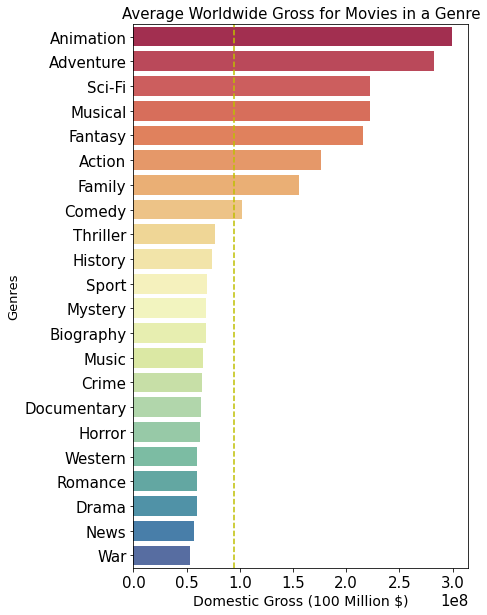

In [97]:
gross_dict_sorted = dict(sorted(gross_dict.items(), key=lambda item: item[1]['average_gross']))
gross_sorted = [value['average_gross'] for key, value in gross_dict_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_dict_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(gross_sorted, genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['worldwide_gross'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('Domestic Gross (100 Million $)', fontsize=14)
ax.set_title('Average Worldwide Gross for Movies in a Genre', fontsize=15);
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\AvgWorldGrossGenre.jpg')

In [95]:
pwd!

'c:\\Users\\kylev\\Documents\\Flatiron\\Project_1_BSC\\microsoft_movie_analysis'

In [12]:
gross_ROI = {}

for genre in list_of_genre_types:
    gross_ROI[genre] = {'average_ROI': movie_title[movie_title[genre] == True]['ROI'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [13]:
del gross_ROI['Reality-TV']
del gross_ROI['None']

C:\Users\kylev\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


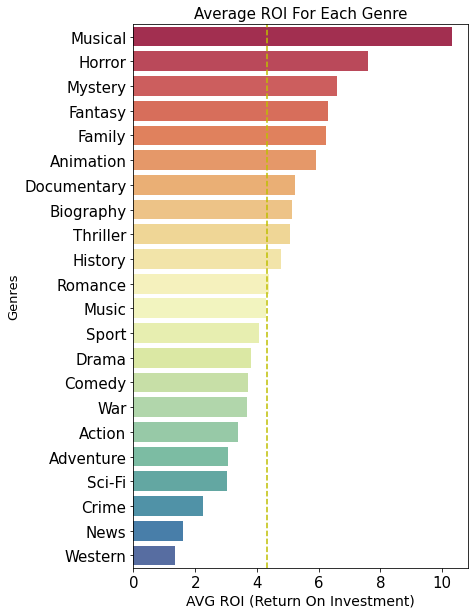

In [98]:
gross_ROI_sorted = dict(sorted(gross_ROI.items(), key=lambda item: item[1]['average_ROI']))
gross_sorted = [value['average_ROI'] for key, value in gross_ROI_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_ROI_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(gross_sorted, genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['ROI'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('AVG ROI (Return On Investment)', fontsize=14)
ax.set_title('Average ROI For Each Genre', fontsize=15);
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\AvgROIGenre.jpg')

In [105]:
#Selecting all data from the rotten tomatoes table and setting it equal to a dataframe
cur.execute('''SELECT * FROM rotten_tomatoes_movies''')
rotten_tomatoes = pd.read_sql('''SELECT * FROM rotten_tomatoes_movies''', conn)

In [106]:
#Creating a new dataframe with no duplicates
rt_genres = rotten_tomatoes.drop_duplicates('movie_title')

In [107]:
#Splitting the genres
rt_genres['genres'] = rt_genres['genres'].str.split(',')
rt_genres_split = rt_genres.explode('genres', ignore_index=False)

<ipython-input-107-2a8531b0e527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_genres['genres'] = rt_genres['genres'].str.split(',')


In [108]:
#Checking the split
rt_genres_split.head(1)

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,Action & Adventure,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [109]:
#Dropping unwanted columns
rt_genres_split.drop(['tomatometer_count','rotten_tomatoes_link', 'movie_info', 'audience_status', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'], axis=1, inplace=True)

In [110]:
#Fixing the axis labels for the graph below
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace(' ', '')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('&', ' & ')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('tH', 't H')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('tM', 't M')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('gA', 'g A')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('eF', 'e F')
rt_genres_split['genres'] = rt_genres_split['genres'].str.replace('lI', 'l I')

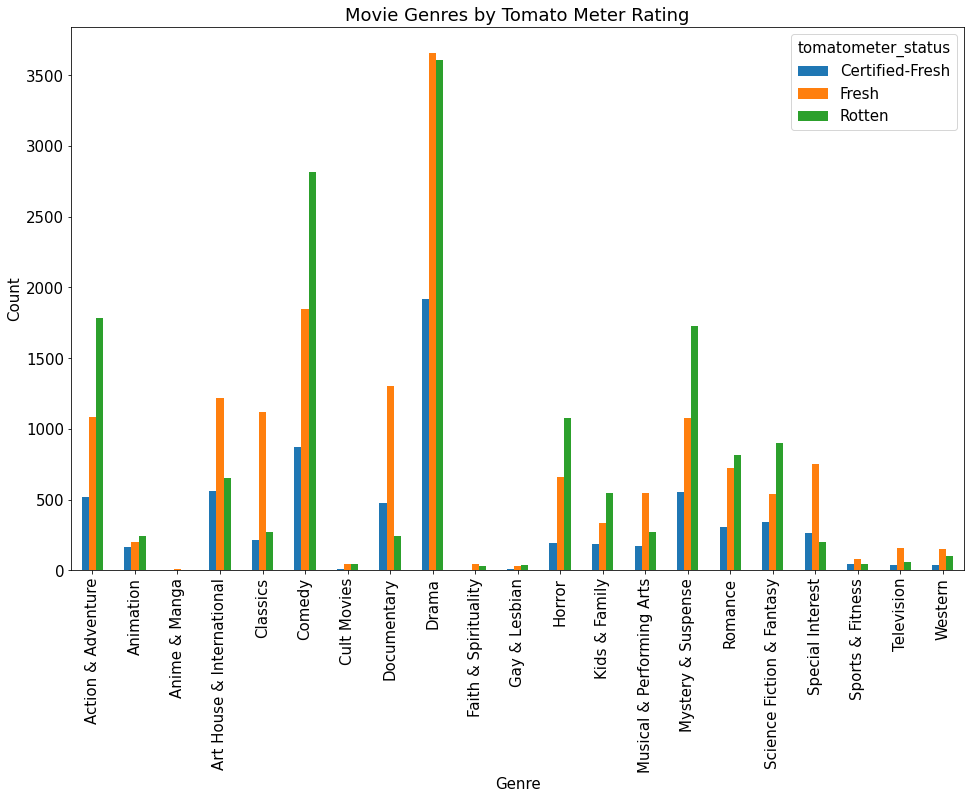

In [111]:
#Creating a bar graph of tomato meter ratings by genre
plt.rcParams.update({'font.size': 15})
rt_genres_split.groupby(['genres', 'tomatometer_status'])\
.count()\
.iloc[:,:1]\
.reset_index()\
.pivot(index='genres', columns='tomatometer_status', values='idx').plot(kind='bar', figsize=(16,10), title='Movie Genres by Tomato Meter Rating', ylabel='Count', xlabel='Genre');

In [15]:
movie_title = movie_title.sort_values('worldwide_gross', ascending=False)

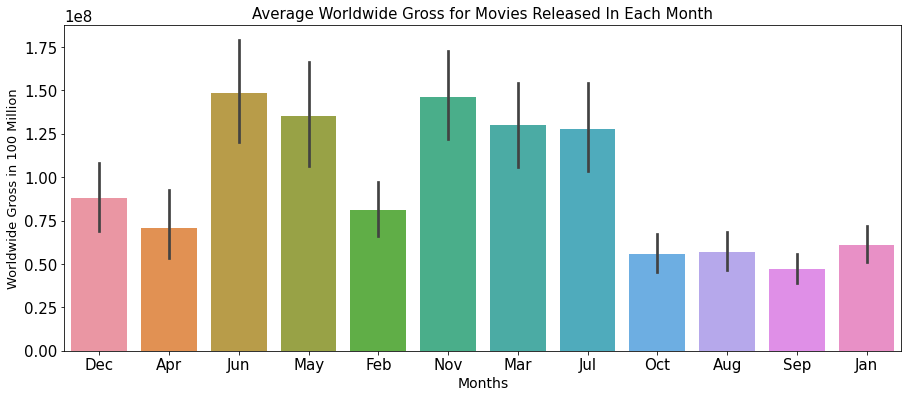

In [99]:
fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=movie_title, x= 'month', y='worldwide_gross')
ax.set_ylabel('Worldwide Gross in 100 Million', fontsize=13)
ax.set_xlabel('Months', fontsize=14)
ax.set_title('Average Worldwide Gross for Movies Released In Each Month', fontsize=15);
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\AvgWorldGrossMonth.jpg')

In [18]:
cur = conn.cursor()
rtandgross = cur.execute('''
SELECT runtime_minutes, original_title, worldwide_gross
FROM imdb_title_basics JOIN tn_movie_budgets 
ON original_title = movie 
''')
rtandgross = pd.DataFrame(cur.fetchall())
rtandgross.columns = [i[0] for i in cur.description]
rtandgross.head(10)


,runtime_minutes,original_title,worldwide_gross
0,91.0,Foodfight!,"$73,706"
1,NaN,Mortal Kombat,"$122,133,227"
2,88.0,The Overnight,"$1,165,996"
3,124.0,On the Road,"$9,313,302"
4,114.0,The Secret Life of Walter Mitty,"$187,861,183"
5,114.0,A Walk Among the Tombstones,"$62,108,587"
6,124.0,Jurassic World,"$1,648,854,864"
7,119.0,The Rum Diary,"$21,544,732"
8,92.0,The Three Stooges,"$54,052,249"
9,98.0,Anderson's Cross,$0


In [19]:
rtandgross['worldwide_gross'] = rtandgross['worldwide_gross'].str.replace('$', '').str.replace(',', '')
rtandgross['worldwide_gross'] = rtandgross['worldwide_gross'].astype(float)
rtandgross.head(10)

,runtime_minutes,original_title,worldwide_gross
0,91.0,Foodfight!,7.370600e+04
1,NaN,Mortal Kombat,1.221332e+08
2,88.0,The Overnight,1.165996e+06
3,124.0,On the Road,9.313302e+06
4,114.0,The Secret Life of Walter Mitty,1.878612e+08
5,114.0,A Walk Among the Tombstones,6.210859e+07
6,124.0,Jurassic World,1.648855e+09
7,119.0,The Rum Diary,2.154473e+07
8,92.0,The Three Stooges,5.405225e+07
9,98.0,Anderson's Cross,0.000000e+00


In [20]:
orderedrtandgross =rtandgross.sort_values('worldwide_gross', ascending=False)
orderedrtandgross=orderedrtandgross.dropna(subset=['runtime_minutes'])
orderedrtandgross.drop_duplicates('original_title')
orderedrtandgross.head(10)

,runtime_minutes,original_title,worldwide_gross
3414,115.0,Titanic,2.208208e+09
2416,149.0,Avengers: Infinity War,2.048134e+09
6,124.0,Jurassic World,1.648855e+09
97,143.0,The Avengers,1.517936e+09
1664,141.0,Avengers: Age of Ultron,1.403014e+09
1069,134.0,Black Panther,1.348258e+09
2645,128.0,Jurassic World: Fallen Kingdom,1.305773e+09
469,93.0,Frozen,1.272470e+09
1553,102.0,Frozen,1.272470e+09
1870,129.0,Beauty and the Beast,1.259200e+09


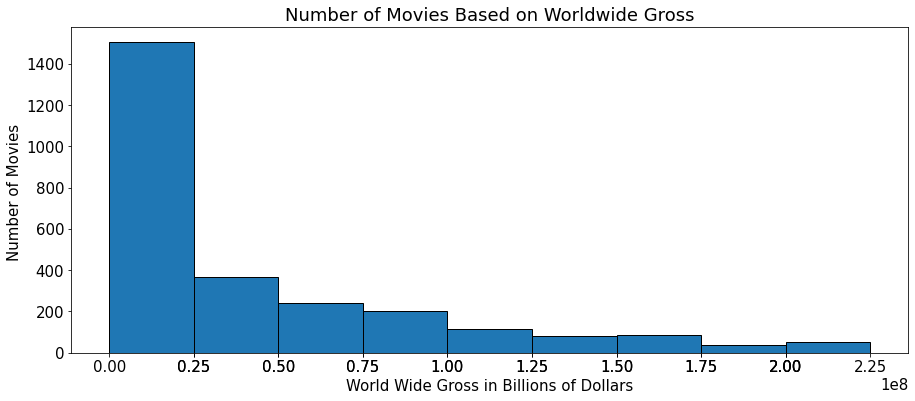

In [100]:
x = orderedrtandgross.worldwide_gross
df = pd.DataFrame({"x":x})
fig, ax = plt.subplots(figsize=(15,6))
bins= [0,25000000,25000000,50000000,50000000,75000000,75000000,100000000,
       100000000,125000000,125000000,150000000,150000000,175000000,175000000,200000000,
       200000000,200000000,225000000 ]
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.xlabel('World Wide Gross in Billions of Dollars')
plt.ylabel('Number of Movies ')
ax.set_title("Number of Movies Based on Worldwide Gross", fontsize=18)

plt.show()
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\AvgWorldGrossNumMovies.jpg')

In [78]:
production_gross = pd.read_sql ('''SELECT movie, release_date,  production_budget, worldwide_gross, genres
                                    FROM tn_movie_budgets
                                    JOIN imdb_title_basics
                                    ON movie=primary_title
                                ''',conn)
production_gross

,movie,release_date,production_budget,worldwide_gross,genres
0,Avatar,"Dec 18, 2009","$425,000,000","$2,776,345,279",Horror
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$1,045,663,875","Action,Adventure,Fantasy"
2,Dark Phoenix,"Jun 7, 2019","$350,000,000","$149,762,350","Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$1,403,013,963","Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"Apr 27, 2018","$300,000,000","$2,048,134,200","Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3810,Cure,"Jul 6, 2001","$10,000","$94,596",Drama
3811,Bang,"Apr 1, 1996","$10,000",$527,None
3812,Newlyweds,"Jan 13, 2012","$9,000","$4,584","Comedy,Drama"
3813,Red 11,"Dec 31, 2018","$7,000",$0,"Horror,Sci-Fi,Thriller"


In [79]:
production_gross['production_budget'] = production_gross['production_budget'].str.replace('$', '').str.replace(',','')
production_gross['production_budget'] = production_gross['production_budget'].astype(float)


In [81]:
production_gross['worldwide_gross'] = production_gross['worldwide_gross'].str.replace('$', '').str.replace(',','')
production_gross['worldwide_gross'] = production_gross['worldwide_gross'].astype(float)


In [82]:
production_gross.sort_values('production_budget', ascending=False)

,movie,release_date,production_budget,worldwide_gross,genres
0,Avatar,"Dec 18, 2009",425000000.0,2.776345e+09,Horror
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,1.045664e+09,"Action,Adventure,Fantasy"
2,Dark Phoenix,"Jun 7, 2019",350000000.0,1.497624e+08,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"May 1, 2015",330600000.0,1.403014e+09,"Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"Apr 27, 2018",300000000.0,2.048134e+09,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
3810,Cure,"Jul 6, 2001",10000.0,9.459600e+04,Drama
3811,Bang,"Apr 1, 1996",10000.0,5.270000e+02,None
3812,Newlyweds,"Jan 13, 2012",9000.0,4.584000e+03,"Comedy,Drama"
3813,Red 11,"Dec 31, 2018",7000.0,0.000000e+00,"Horror,Sci-Fi,Thriller"


In [83]:
production_gross.drop_duplicates(subset ="movie",
                     keep = False, inplace = True)

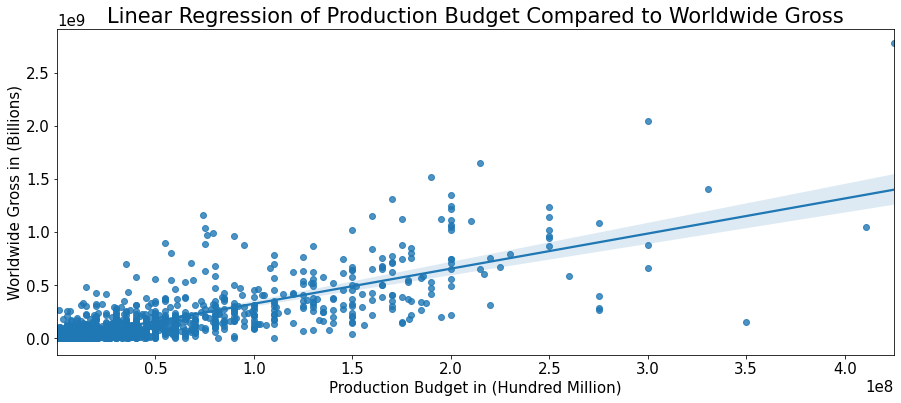

In [101]:
fig, ax = plt.subplots(figsize=(15,6))
#plt.xlim([0,2])

sns.regplot(data=production_gross, x="production_budget", y="worldwide_gross")
ax.set_ylabel('Worldwide Gross in (Billions)', fontsize=15)
ax.set_xlabel('Production Budget in (Hundred Million)', fontsize=15)
ax.set_title('Linear Regression of Production Budget Compared to Worldwide Gross', fontsize = 21)
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\ProdBudgetWorldGross.jpg')

In [25]:
runtime = np.mean(orderedrtandgross.runtime_minutes)

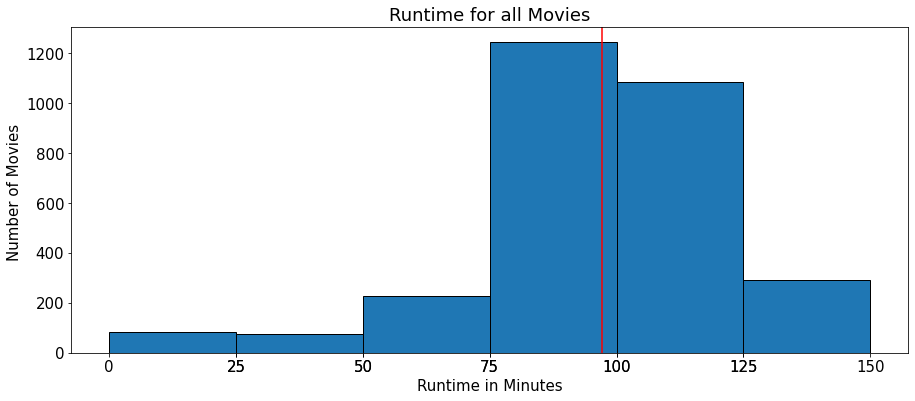

In [102]:
x = orderedrtandgross.runtime_minutes
df = pd.DataFrame({"x":x})
fig, ax = plt.subplots(figsize=(15,6))
bins= [0,25 ,25,50 ,50,75 ,75,100 ,100,125 ,125 ,150]
plt.hist(df.values, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.axvline(runtime, color = 'red')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies ')
ax.set_title("Runtime for all Movies", fontsize=18)

plt.show()
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\AVGRuntimeMovies.jpg')

In [27]:
gross_RunTime = {}

for genre in list_of_genre_types:
    gross_RunTime[genre] = {'average_RunTime': movie_title[movie_title[genre] == True]['runtime_minutes'].mean(),
                           'number_movies': len(movie_title[movie_title[genre] == True])}

In [28]:
del gross_RunTime['Reality-TV']
del gross_RunTime['None']

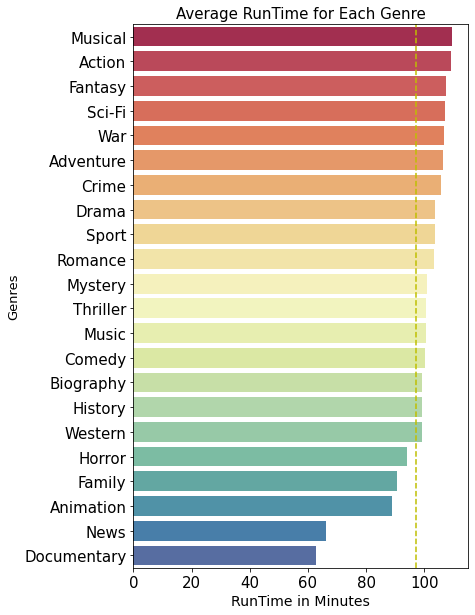

In [103]:
gross_RunTime_sorted = dict(sorted(gross_RunTime.items(), key=lambda item: item[1]['average_RunTime']))
gross_sorted = [value['average_RunTime'] for key, value in gross_RunTime_sorted.items()][::-1]
genres_sorted = [key for key, value in gross_RunTime_sorted.items()][::-1]
fig, ax = plt.subplots(figsize=(6,10))
# Draw plot
sns.barplot(x=gross_sorted, y=genres_sorted, palette = 'Spectral', orient='horizonatal')
# Add a line to show the average domestic gross for all movies.
avg_gross = np.mean(movie_title['runtime_minutes'])
plt.axvline(x=avg_gross, ymin=0, ymax=1, color='y', linestyle='--')
# Set labels
ax.tick_params(axis='x' , labelrotation = 0)
ax.set_ylabel('Genres', fontsize=13)
ax.set_xlabel('RunTime in Minutes', fontsize=14)
ax.set_title('Average RunTime for Each Genre', fontsize=15);
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\AvgRuntimeMovieGenre.jpg')

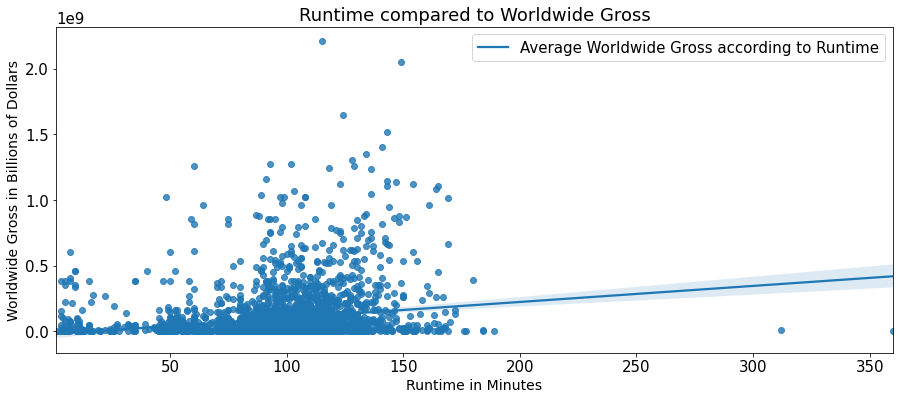

In [104]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Runtime compared to Worldwide Gross", fontsize=18)
sns.regplot(data=orderedrtandgross, x='runtime_minutes', y='worldwide_gross')
ax.set_xlabel("Runtime in Minutes", fontsize=14)
ax.set_ylabel("Worldwide Gross in Billions of Dollars", fontsize=14)
ax.legend(["Average Worldwide Gross according to Runtime"]);
# the line below saves the figure to a .jpg in the images folder, uncomment to re-save
fig.savefig('images\RuntimeWorldGross.jpg')